# Plot cluster map of samples mRNA

Script related to figure s1a

### Aim:
- Plot clustermap of transcriptomes as additional visualisation

In [3]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [5]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys, sep='\t', index_col='Well')

In [6]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [7]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [8]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [9]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load expression data

In [10]:
data_file = home + "Data/1/TreatmentNaive_log2exp_loess_norm.txt"

data = pd.read_csv(data_file, sep='\t', index_col='Hugo_Symbol')

In [11]:
data.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.124711,3.880633,4.864973,4.167882,4.317845,3.679057,4.092837,4.370571,4.252637,4.174694,...,3.804537,4.416981,4.169014,4.503313,4.146333,4.078398,4.011369,3.845128,3.600927,4.521857
A2BP1,3.960924,4.033715,3.721251,3.916073,4.338194,3.357396,3.872447,3.803388,3.484735,4.427405,...,4.991068,3.799913,4.117883,4.122134,4.221760,3.648326,3.675317,3.546925,3.788279,4.920841
A2M,12.603155,10.859838,12.612923,9.176999,10.548790,11.840776,7.200547,11.835658,11.535547,7.080118,...,9.061598,9.189459,8.844728,7.464440,6.726233,9.265911,10.740486,9.735582,10.781599,8.734304
A2ML1,3.945877,4.000621,3.767932,3.789729,3.543204,3.805520,4.336280,4.031757,4.166018,3.673146,...,4.231174,3.871651,3.287232,3.721093,3.723801,3.884499,3.694111,3.937682,3.600471,3.402861
A4GALT,3.597277,3.863757,4.051844,4.113169,3.975144,3.991293,5.439960,4.696177,4.171788,4.041633,...,4.183089,4.699729,4.019537,3.739865,4.591953,4.997860,4.099630,5.001239,4.714710,4.145119


### Select 100 most variable genes

In [12]:
most_var_genes = data.mad(axis="columns").sort_values(ascending=False).head(n=100).index

In [13]:
data = data.loc[most_var_genes]

len(data)

100

## Perform sample correlation clustermap

In [14]:
data_corr = data.corr()

### Add binary tumour cellularity info

In [15]:
median_tumcell = sample_labels['TumourCellularity_WES'].median()
sample_labels['TumCell_WES_bin'] = sample_labels['TumourCellularity_WES'] > median_tumcell

In [16]:
sample_labels['TumCell_WES_bin'].replace([True,False],
                                         ['k','w'],
                                         inplace=True)

### Plot

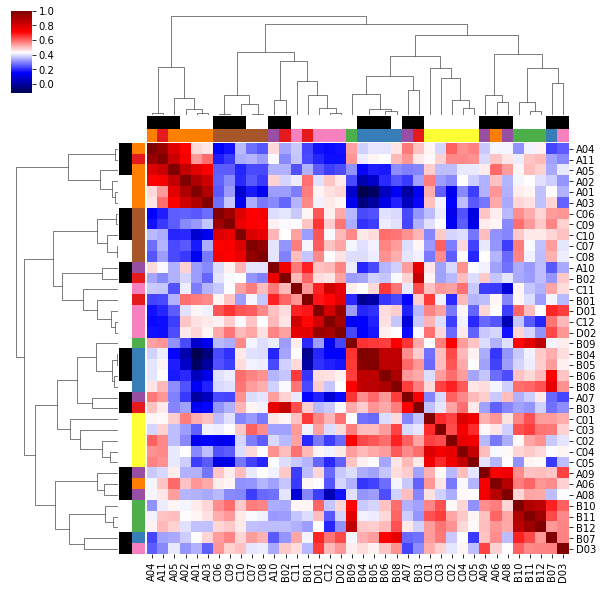

In [17]:
g = sns.clustermap(data_corr,
                   cmap='seismic',
                   metric='correlation',
                   row_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                   linewidths=0.0, rasterized=True
                  )

In [18]:
data_corr.shape

(38, 38)

### Save plot

In [19]:
ls ../../Figures/supplementary/1/

OVCT_Fig_s1.pdf  OVCT_Fig_s1.png  README.md        panels/


In [20]:
FILE = "../../Figures/supplementary/1/panels/s1a_TreatmentNaive_mRNA_clustermap.pdf"

g.savefig(FILE, bbox='tight')

# End script